### Support Vector Classifier Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_classification

In [16]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

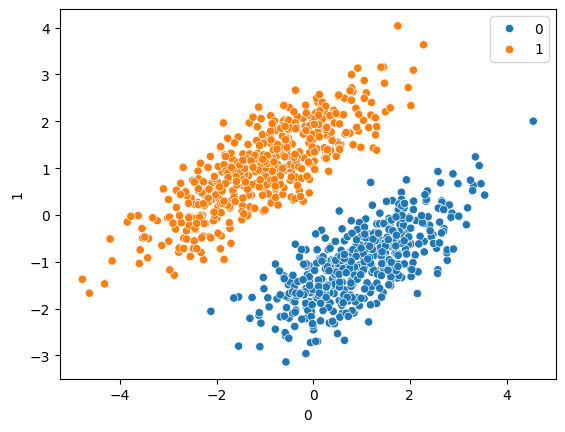

In [17]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [20]:
from sklearn.svm import SVC

In [21]:
svc = SVC(kernel='linear')

In [22]:
svc.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [23]:
y_pred = svc.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       127

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[123   0]
 [  0 127]]


In [34]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

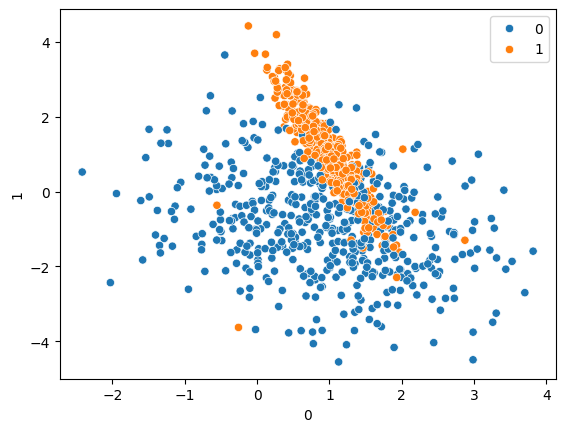

In [35]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [68]:
rbf = SVC(kernel='rbf')

In [69]:
rbf.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [70]:
y_pred_rbf= rbf.predict(X_test)

In [71]:
print(classification_report(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       117
           1       0.89      0.95      0.92       133

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[101  16]
 [  7 126]]


___
### HyperParameter Tuning with SVC

In [72]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [79]:
grid = GridSearchCV(SVC(), param_grid=param_grid, refit=True, cv=5, verbose=3)

In [80]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.793 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.793 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.847 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [81]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [83]:
# Prediction
y_grid_pred = grid.predict(X_test)

In [84]:
print(classification_report(y_test, y_grid_pred))
print(confusion_matrix(y_test, y_grid_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       117
           1       0.92      0.96      0.94       133

    accuracy                           0.94       250
   macro avg       0.94      0.93      0.94       250
weighted avg       0.94      0.94      0.94       250

[[106  11]
 [  5 128]]


___
### **SVM Kernels** Indepth Intution And Pratical Explanation

In [86]:
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x **2)
y = np.hstack([y, -y])
x = np.hstack([x, -x])

In [87]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1 **2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

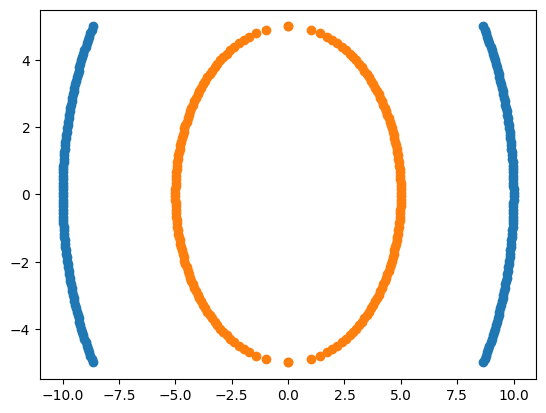

In [88]:
plt.scatter(y, x)
plt.scatter(y1, x1)
plt.show()

In [94]:
df1 = pd.DataFrame(np.vstack([y, x]).T, columns=['X1', 'X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1', 'X2'])
df2['Y'] = 1
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [95]:
df.tail()

,X1,X2,Y
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1
399,-0.000000,-5.00000,1


In [104]:
## Dividing into Dependent and independent features
X = df.iloc[:, :2]
X

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
395,-1.969049,-4.59596
396,-1.714198,-4.69697
397,-1.406908,-4.79798
398,-0.999949,-4.89899


In [105]:
X = df.loc[:, ["X1", "X2"]]
X

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
395,-1.969049,-4.59596
396,-1.714198,-4.69697
397,-1.406908,-4.79798
398,-0.999949,-4.89899


In [ ]:
y = df['Y'] # df.Y
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [ ]:
y = df.loc[:, "Y"] # df.iloc[:, 2]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

**Polynomial Kernel**

In [114]:
# We need to find components for the Polynomial Kernel
# X1, X2, X1_square, X1*X2

df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1*X2'] = (df['X1'] * df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009
